=== 5-Fold CV (Area + Bedrooms + Location) ===
Average MSE: 6532968583168.32
Average R^2: 0.9341

=== Full-Data Fit ===
Intercept: -8451411.494729
Area: 6102.200056
Bedrooms: 139173.003774
Location_Suburban: 5213792.908745
Location_Urban: 13746869.025823
MSE: 6439128947292.67
R^2: 0.9355


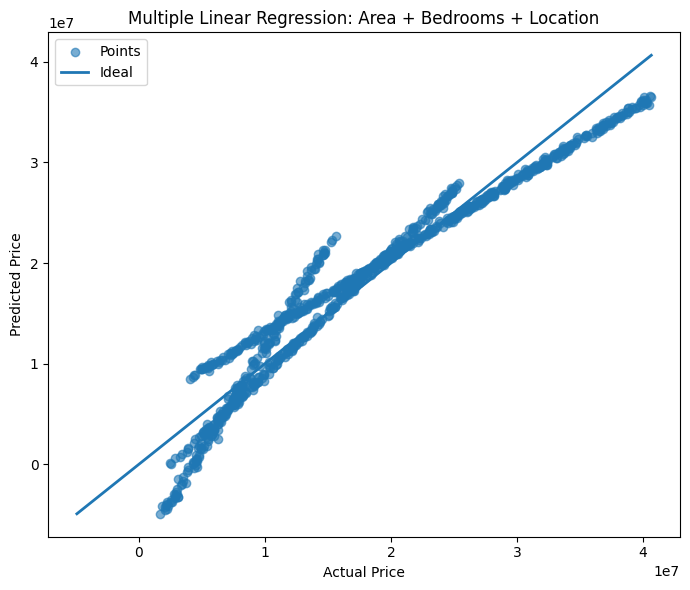

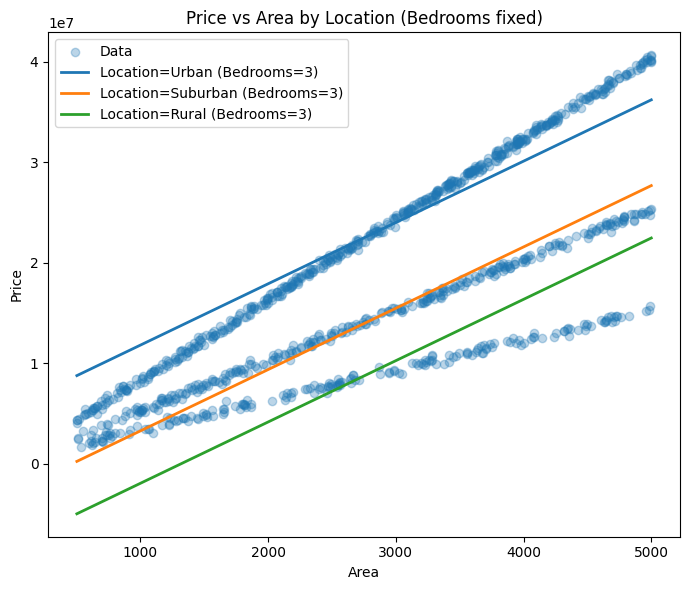

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import radians, cos, sin, asin, sqrt
# Load dataset
df = pd.read_csv("uber.csv")
df.info()

# Data Cleaning
df.dropna(inplace=True)
df = df[df['fare_amount'] > 0]
df = df[df['passenger_count'].between(1, 6)]

df.info()
print(df.head())

# Haversine Distance Function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    return R * c
df.info()


# Feature Engineering
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                                                   row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# EDA Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='fare_amount', data=df, alpha=0.3)
plt.title("Fare vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.show()

plt.plot(df['distance_km'], df['fare_amount'], marker='o')
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.title("Fare vs Distance")
plt.show()


plt.figure(figsize=(8, 6))
corr = df[['fare_amount', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'distance_km']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Select Features
features = ['passenger_count', 'hour', 'day', 'month', 'weekday', 'distance_km']
X = df[features]
y = df['fare_amount']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)

# Print few rows of scaled training data
print("Scaled Training Data (first 10 rows):")
print(X_train_scaled_df.head(10))

# Print few rows of scaled testing data
print("\nScaled Testing Data (first 10 rows):")
print(X_test_scaled_df.head(10))


# Apply PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Print number of components chosen
print(f"Number of PCA components retained: {pca.n_components_}")

# Print first 2 principal components (loadings)
print("\nFirst 2 Principal Components (weights of original features):")
print(pca.components_[:2])

# Convert to DataFrames for readability
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(X_train_pca.shape[1])])
X_test_pca_df  = pd.DataFrame(X_test_pca,  columns=[f"PC{i+1}" for i in range(X_test_pca.shape[1])])

# Print first 10 rows
print("\nTraining Data after PCA (first 10 rows):")
print(X_train_pca_df.head(10))

print("\nTesting Data after PCA (first 10 rows):")
print(X_test_pca_df.head(10))

